In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [2]:
from model_utils import load_X_y

X, y = load_X_y()

# Categorical Target Thresholding

In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [4]:
from model_utils import categorical_threasholding_y

y = categorical_threasholding_y(y, multiclass_percentiles=[0.25, 0.75])

In [5]:
import pandas as pd

cat = pd.Categorical(y, ordered=True, categories = ['Unsuccesful','Neutral','Succesful'])
y = pd.Series(cat.codes)
y_labels = cat.categories

# Split the Data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2160, 224), (721, 224), (2160,), (721,))

# Feature Selection

using only movie-related features 


In [7]:
from model_utils import boruta_feature_selection

X_train_sel, X_test_sel = boruta_feature_selection(X_train, X_test, y_train, max_iter=100)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100


BorutaPy finished running.

Iteration: 	44 / 100
Confirmed: 	33
Tentative: 	0
Rejected: 	186


In [8]:
X_train_sel.shape, X_test_sel.shape

((2160, 38), (721, 38))

# MATI MERGING GRIDSEARCH

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from model_utils import run_grid_search2

cv_results = run_grid_search2(X_train_sel, y_train)

Fitting 5 folds for each of 386 candidates, totalling 1930 fits
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   3.9s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   1.4s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   1.4s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   1.2s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=passthrough; total time=   1.3s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x1286680a0>; total time=   1.1s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDropperTransformer object at 0x1286680a0>; total time=   1.0s
[CV] END clf=SVC(), clf__C=0.1, clf__gamma=1, clf__kernel=rbf, marcro_drop=<settings.columnDrop

In [10]:
cv_results

,param_clf,param_clf__C,param_clf__gamma,param_clf__kernel,param_marcro_drop,param_clf__penalty,param_clf__solver,param_clf__var_smoothing,param_clf__activation,param_clf__alpha,...,param_clf__bootstrap,param_clf__max_depth,param_clf__min_samples_leaf,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_clf_name,marcro_drop_name
339,"RandomForestClassifier(bootstrap=False, max_de...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,14,2,0.902778,0.893519,0.896759,0.007965,1,RandomForestClassifier,without_macro
375,"RandomForestClassifier(bootstrap=False, max_de...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,20,2,0.905093,0.902778,0.896759,0.007551,1,RandomForestClassifier,without_macro
279,"RandomForestClassifier(bootstrap=False, max_de...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,True,16,2,0.902778,0.898148,0.895370,0.007938,3,RandomForestClassifier,without_macro
351,"RandomForestClassifier(bootstrap=False, max_de...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,16,2,0.895833,0.895833,0.894444,0.004036,4,RandomForestClassifier,without_macro
327,"RandomForestClassifier(bootstrap=False, max_de...",NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,NaN,NaN,NaN,...,False,12,2,0.893519,0.900463,0.894444,0.008612,4,RandomForestClassifier,without_macro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,GaussianNB(),NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,0.1,NaN,NaN,...,NaN,NaN,NaN,0.458333,0.446759,0.442130,0.015971,382,GaussianNB,without_macro
144,GaussianNB(),NaN,NaN,NaN,passthrough,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0.449074,0.435185,0.427315,0.016473,383,GaussianNB,with_macro
145,GaussianNB(),NaN,NaN,NaN,<settings.columnDropperTransformer object at 0...,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0.449074,0.430556,0.425463,0.015383,384,GaussianNB,without_macro
96,LogisticRegression(max_iter=500),0.001,NaN,NaN,passthrough,l1,liblinear,NaN,NaN,NaN,...,NaN,NaN,NaN,0.261574,0.293981,0.250926,0.028449,385,LogisticRegression,with_macro


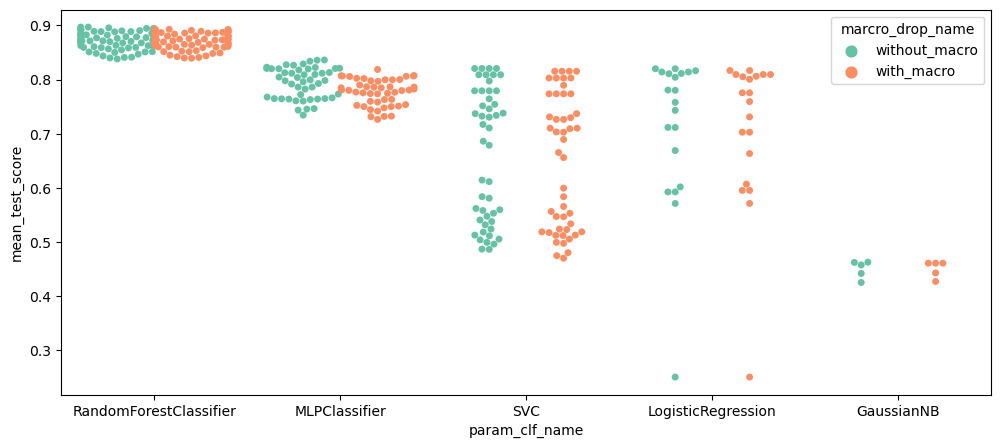

In [11]:
from model_utils import compare_models_plot
    
compare_models_plot(cv_results)

# Evaluation

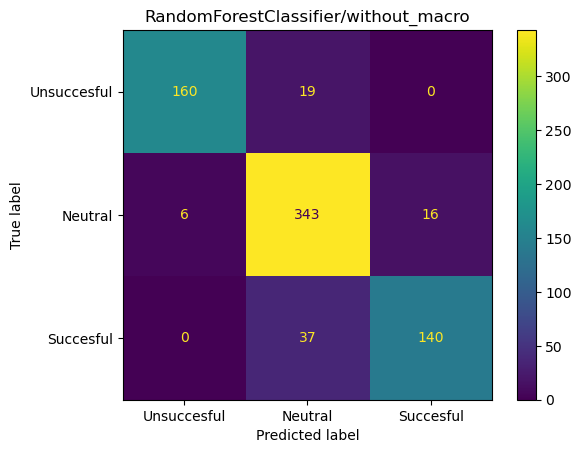

              precision    recall  f1-score   support

 Unsuccesful       0.96      0.89      0.93       179
     Neutral       0.86      0.94      0.90       365
   Succesful       0.90      0.79      0.84       177

    accuracy                           0.89       721
   macro avg       0.91      0.87      0.89       721
weighted avg       0.89      0.89      0.89       721



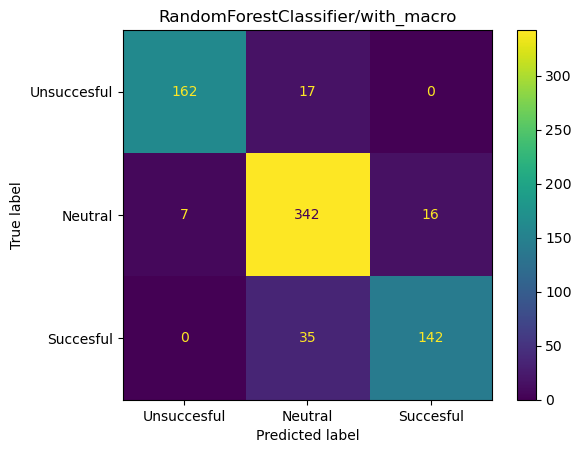

              precision    recall  f1-score   support

 Unsuccesful       0.96      0.91      0.93       179
     Neutral       0.87      0.94      0.90       365
   Succesful       0.90      0.80      0.85       177

    accuracy                           0.90       721
   macro avg       0.91      0.88      0.89       721
weighted avg       0.90      0.90      0.90       721



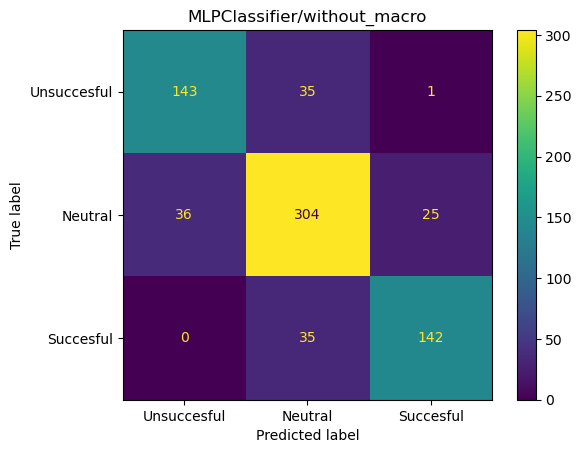

              precision    recall  f1-score   support

 Unsuccesful       0.80      0.80      0.80       179
     Neutral       0.81      0.83      0.82       365
   Succesful       0.85      0.80      0.82       177

    accuracy                           0.82       721
   macro avg       0.82      0.81      0.81       721
weighted avg       0.82      0.82      0.82       721



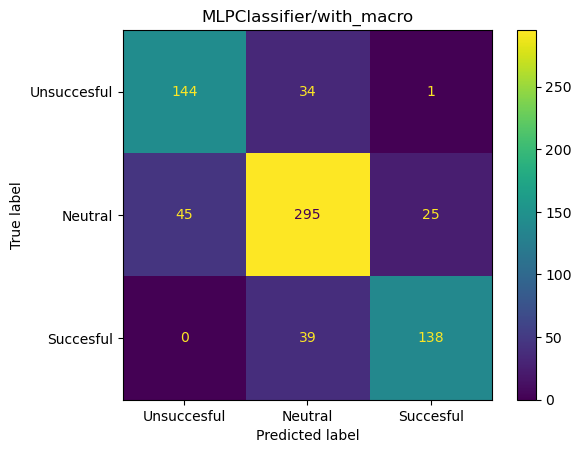

              precision    recall  f1-score   support

 Unsuccesful       0.76      0.80      0.78       179
     Neutral       0.80      0.81      0.80       365
   Succesful       0.84      0.78      0.81       177

    accuracy                           0.80       721
   macro avg       0.80      0.80      0.80       721
weighted avg       0.80      0.80      0.80       721



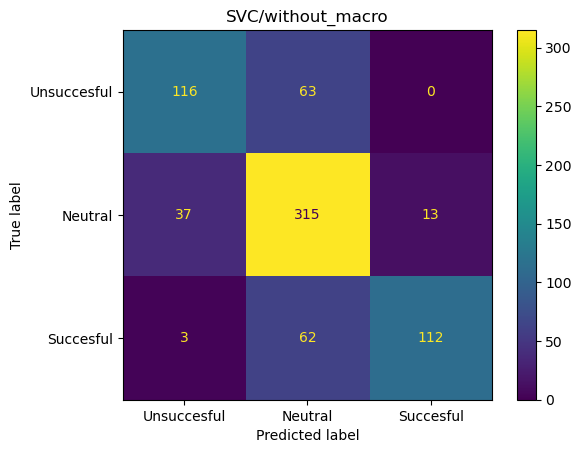

              precision    recall  f1-score   support

 Unsuccesful       0.74      0.65      0.69       179
     Neutral       0.72      0.86      0.78       365
   Succesful       0.90      0.63      0.74       177

    accuracy                           0.75       721
   macro avg       0.79      0.71      0.74       721
weighted avg       0.77      0.75      0.75       721



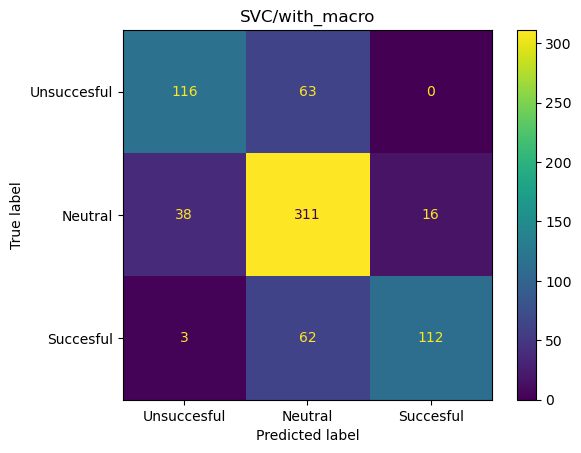

              precision    recall  f1-score   support

 Unsuccesful       0.74      0.65      0.69       179
     Neutral       0.71      0.85      0.78       365
   Succesful       0.88      0.63      0.73       177

    accuracy                           0.75       721
   macro avg       0.78      0.71      0.73       721
weighted avg       0.76      0.75      0.74       721



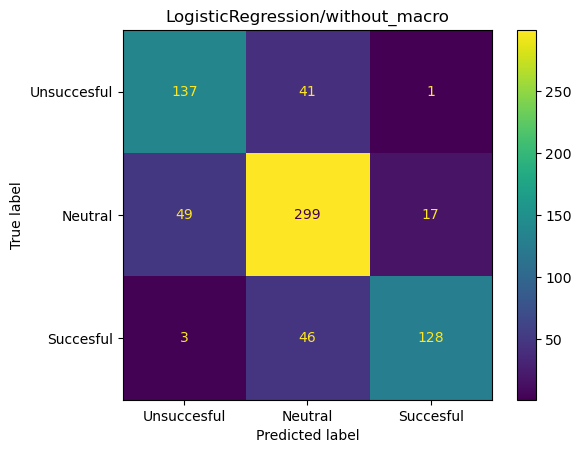

              precision    recall  f1-score   support

 Unsuccesful       0.72      0.77      0.74       179
     Neutral       0.77      0.82      0.80       365
   Succesful       0.88      0.72      0.79       177

    accuracy                           0.78       721
   macro avg       0.79      0.77      0.78       721
weighted avg       0.79      0.78      0.78       721



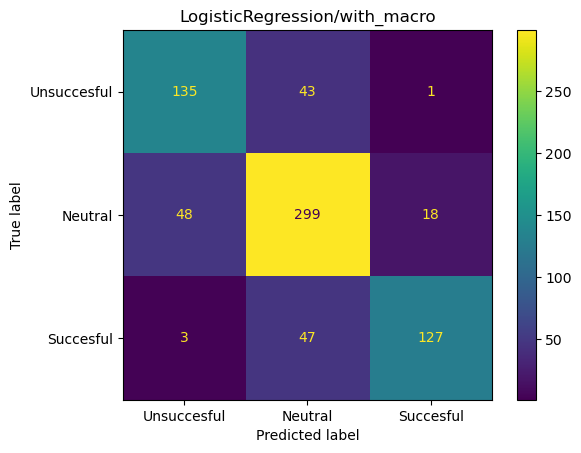

              precision    recall  f1-score   support

 Unsuccesful       0.73      0.75      0.74       179
     Neutral       0.77      0.82      0.79       365
   Succesful       0.87      0.72      0.79       177

    accuracy                           0.78       721
   macro avg       0.79      0.76      0.77       721
weighted avg       0.78      0.78      0.78       721



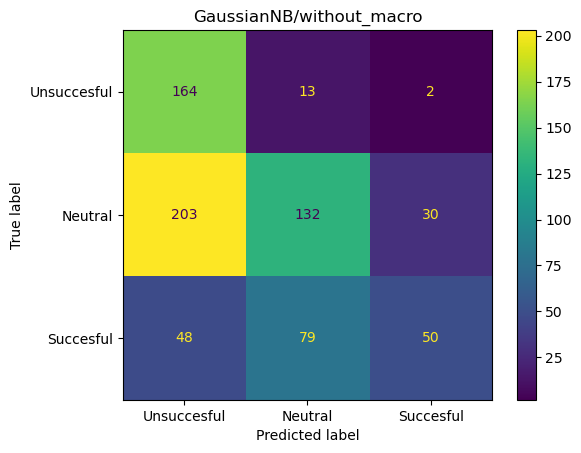

              precision    recall  f1-score   support

 Unsuccesful       0.40      0.92      0.55       179
     Neutral       0.59      0.36      0.45       365
   Succesful       0.61      0.28      0.39       177

    accuracy                           0.48       721
   macro avg       0.53      0.52      0.46       721
weighted avg       0.55      0.48      0.46       721



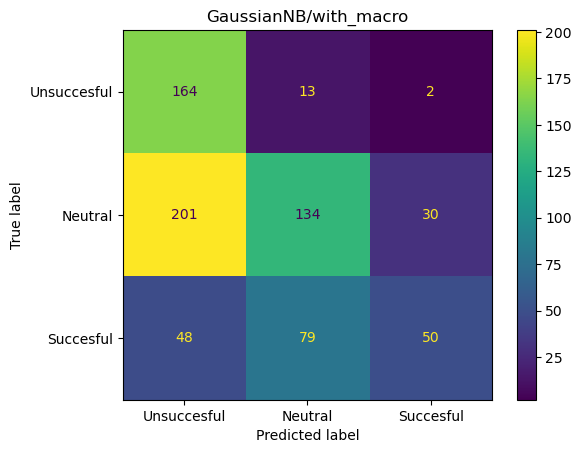

              precision    recall  f1-score   support

 Unsuccesful       0.40      0.92      0.55       179
     Neutral       0.59      0.37      0.45       365
   Succesful       0.61      0.28      0.39       177

    accuracy                           0.48       721
   macro avg       0.53      0.52      0.46       721
weighted avg       0.55      0.48      0.46       721



In [12]:
from model_utils import evaluate_best_models
evaluate_best_models(cv_results, X_train_sel, y_train, X_test_sel, y_test, labels=[0,1,2], target_names=y_labels)

## baseline model

In [13]:
print(y_test.value_counts())

1    365
0    179
2    177
dtype: int64


In [14]:
# zero rule algorithm for classification
import pandas as pd
zero_rule = pd.Series([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(zero_rule)

0      1
1      1
2      1
3      1
4      1
      ..
716    1
717    1
718    1
719    1
720    1
Length: 721, dtype: int64


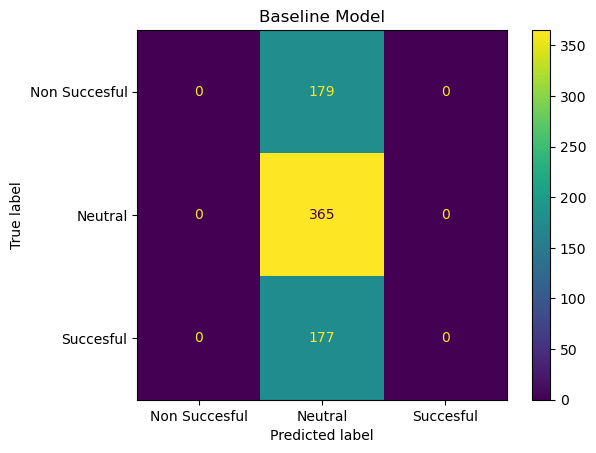

               precision    recall  f1-score   support

Non Succesful       0.00      0.00      0.00       179
      Neutral       0.51      1.00      0.67       365
    Succesful       0.00      0.00      0.00       177

     accuracy                           0.51       721
    macro avg       0.17      0.33      0.22       721
 weighted avg       0.26      0.51      0.34       721



In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

labels=[0,1,2]
target_names=['Non Succesful',"Neutral", 'Succesful']

cm = confusion_matrix(y_true = y_test, y_pred = zero_rule, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title('Baseline Model')
plt.show()
print(classification_report(y_true=y_test, y_pred=zero_rule, target_names=target_names))

## SHAP on the best performing model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, min_samples_leaf=2)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

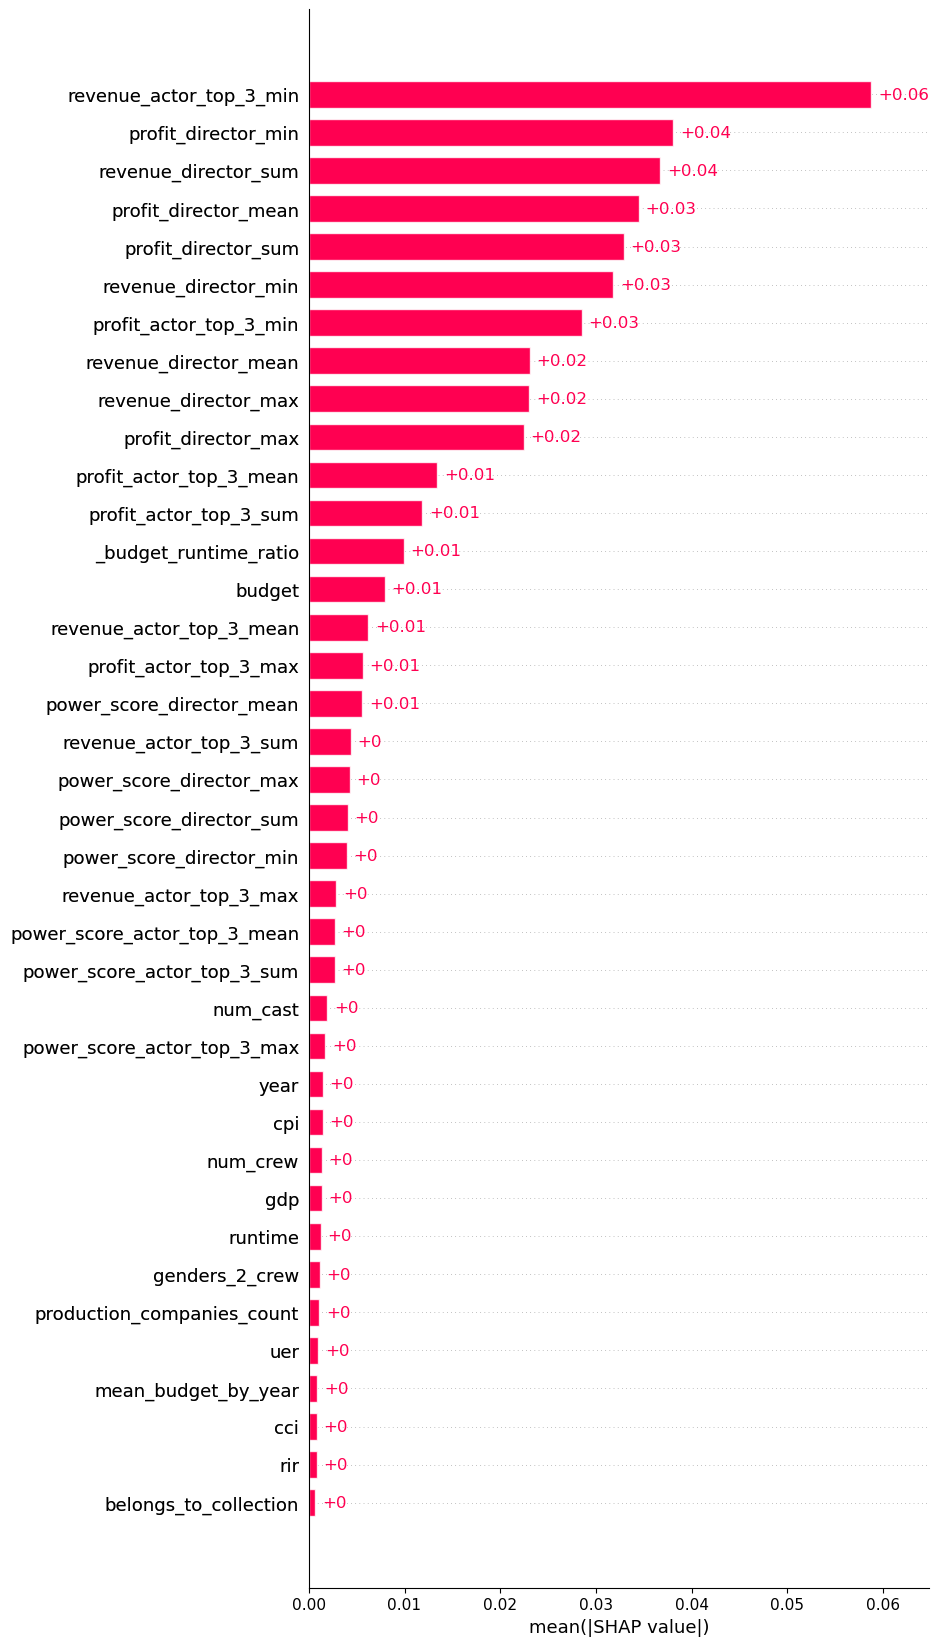

In [26]:
import matplotlib.pyplot as plt

explainer = shap.Explainer(model)
shap_values2 = explainer(X_train_sel)
fig = shap.plots.bar(shap_values2[:, :, 0], max_display=X_train_sel.shape[1], show = False)
plt.savefig("images/shap_4.jpg", dpi=150, bbox_inches='tight')